# Importing libraries

In [2]:
# Import the required libraries

import pandas as pd
import numpy as np

import re
import regex
import datetime as date
from collections import Counter

import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

from pandas import ExcelWriter
from pandas import ExcelFile

 # Q 1. Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

In [2]:
workbook_url = 'HospitalDatabase.xlsx'
ReAdmissionRegistry_df = pd.read_excel(workbook_url,sheet_name='ReAdmissionRegistry')
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


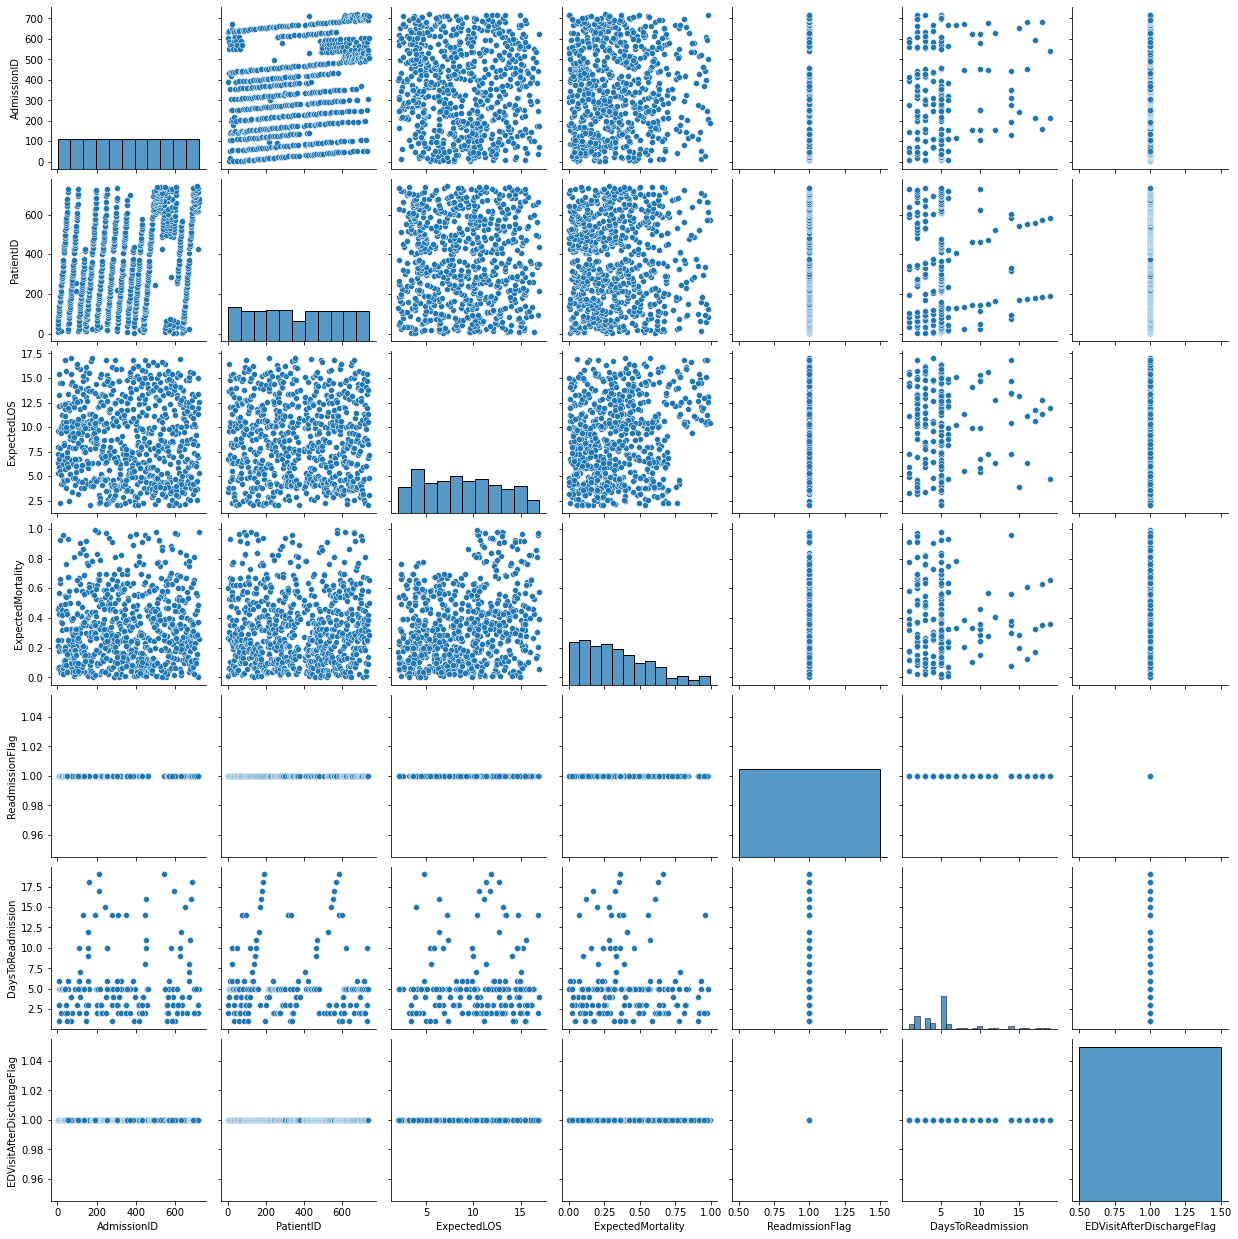

In [3]:
sns.pairplot(ReAdmissionRegistry_df)

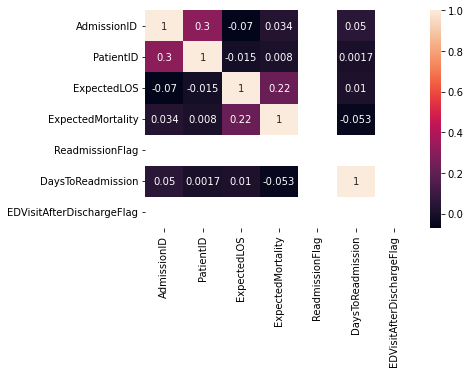

In [4]:
# Heatmaps provide better correlation stats than pairplot
correlation = sns.heatmap(ReAdmissionRegistry_df.corr(), annot=True)

# Answer - I found correlation of 0.3 between patientID & AdmissionID Columns. Also I found correlation of 0.22 between ExpectedMortality & ExpectedLOS Columns. 

# Bonus : Additionally analyzed with help of heat map.

# Q 36. Create a correlation matrix on EDVisits.

      EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0             1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2            13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4            15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
...         ...        ...                     ...                     ...   
1194       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
1195       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
1196       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
1197       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
1198       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

      Acuity ReasonForVisit EDDisposition  
0          1   Stom

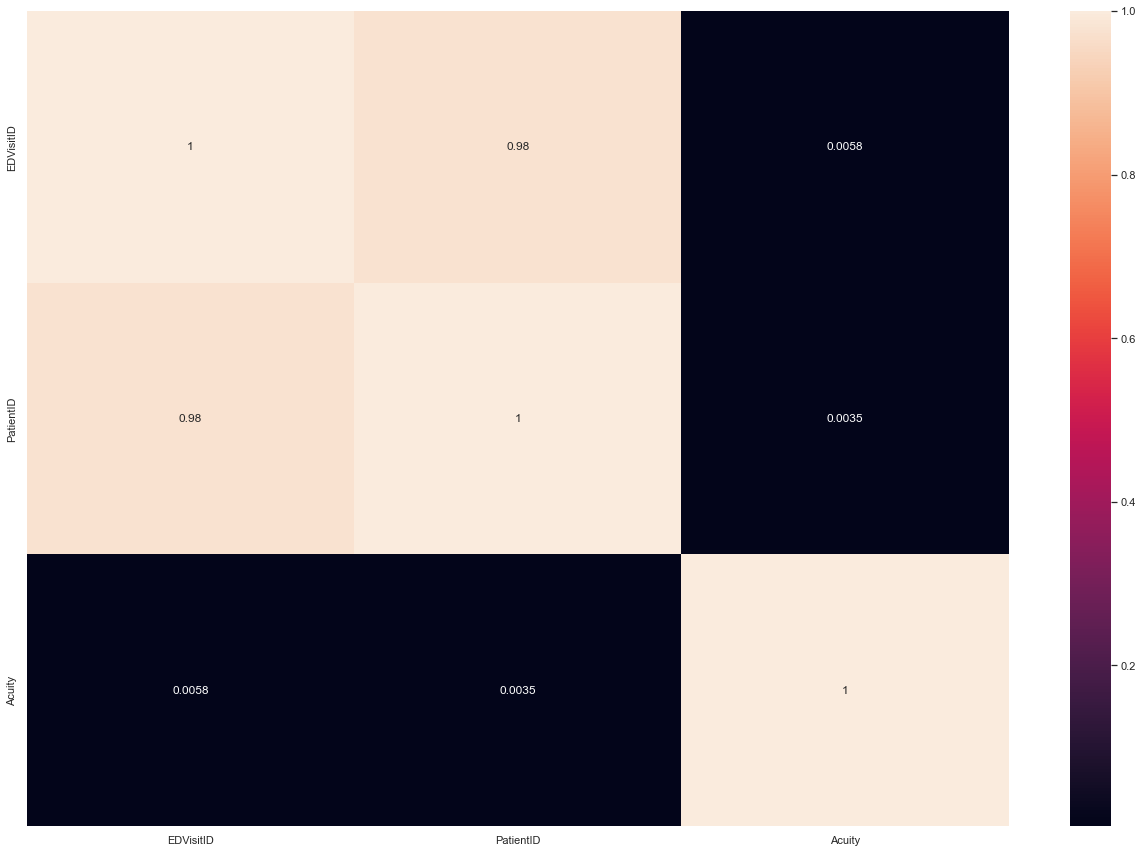

In [65]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
print(df)
matrix = df.corr()
print("Correlation Matrix is : ")
print(matrix)
correlation = sns.heatmap(matrix, annot=True)

# Bonus : We have additionally showcased the correlation using heatmap

# Q 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [73]:
%matplotlib inline
df=pd.read_csv('HospitalDatabase-Discharges.csv')
df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,1/1/2018,1/7/2018,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,1/6/2018,1/18/2018,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,1/7/2018,1/11/2018,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,1/7/2018,1/15/2018,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,1/7/2018,1/15/2018,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2/21/2018,3/6/2018,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2/22/2018,2/26/2018,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2/22/2018,2/27/2018,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2/22/2018,3/5/2018,Transfer,ICU,Heart Failure,13.323413,0.490892


Method 2:

In [74]:
pd.pivot_table(df,index=['Service','PrimaryDiagnosis'],values='ExpectedLOS',aggfunc='mean',margins=True)

ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fever                  8.865651
                 Flu                    7.033979
                 Hypertension           7.864913
                 Kidney Failure         7.850346
                 Knee Replacement       2.255705
                 Laceration             7.069360
                 Pneumonia              8.146240
                 Stroke                15.349671
ICU              AMI                   12.503213
                 Afib                   9.651522
                 Fever                  3.860693
                 Flu                    4.953871
                 Heart Failure         12.784620
                 Hypertension           5.092533
                 Kidney Failure         9.045995
                 Laceration            10.101443
                 Pneumonia             13.523626
                 Spinal Cord Injury    15.276540
                 Stroke                13.297978
Neurology        AMI                   10.482847
                 Flu                    6.700593
                 Heart Failure         12.737565
                 Hypertension           4.276454
                 Migraine              12.202213
                 Pain                  11.441453
                 Pneumonia              7.527330
                 Stroke                12.745608
Orthopeadics     Hip Fracture           3.474971
                 Knee Replacement       3.702839
All                                     8.824589

<AxesSubplot:xlabel='Service', ylabel='PrimaryDiagnosis'>

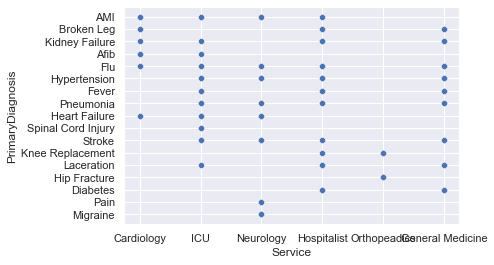

In [75]:
sns.scatterplot(data=df,x='Service',y='PrimaryDiagnosis')

# Bonus : Giving a scatter plot representation of services vs. primary diagnosis.

# Q 45. Calculate mortality by diagnosis.

In [165]:
df=pd.read_csv('HospitalDatabase-Discharges.csv')
pd.pivot_table(df,index=['PrimaryDiagnosis','ExpectedMortality'])

AdmissionID  ExpectedLOS  PatientID
PrimaryDiagnosis ExpectedMortality                                     
AMI              0.004666                   181     9.852817        459
                 0.009274                   511    12.859779        636
                 0.010823                   451    11.214127        173
                 0.012913                    86    12.040957        427
                 0.017010                   191    11.112877        580
...                                         ...          ...        ...
Stroke           0.926305                    12    14.457094        159
                 0.957984                    27    10.516934        335
                 0.958035                   444    16.838918         95
                 0.980479                   207    13.156892        123
                 0.980886                   203    10.621573         85

[720 rows x 3 columns]

<AxesSubplot:xlabel='PrimaryDiagnosis'>

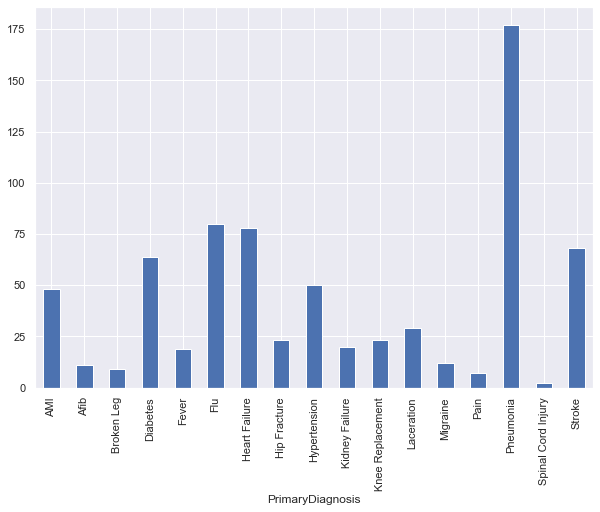

In [166]:
df.groupby(['PrimaryDiagnosis']).count()['ExpectedMortality'].plot(kind='bar',figsize=(10,7))

# Bonus : Represented mortality by diagnosis in a bar chart.

# Bonus Q 81. Show all the Male, Black/African-American, above the age of 55 who visit the hospital.

In [117]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

df = Patients_df.loc[(Patients_df['Age'] > 55) & 
              (Patients_df['Race'] == 'Black/African-American') & (Patients_df['Gender']== 'Male')]
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
81,83,Charmine,Bernardt,1964-07-28 15:49:41.229,Male,Black/African-American,Spanish,1964,58
84,86,Aurore,Harrild,1964-07-05 10:50:46.122,Male,Black/African-American,Spanish,1964,58
89,46,Ilise,de,1965-10-20 06:23:48.785,Male,Black/African-American,Spanish,1965,57
96,97,Skippie,Breagan,1966-12-01 19:45:47.561,Male,Black/African-American,Spanish,1966,56
101,102,Gipsy,Frankton,1964-06-13 06:52:25.324,Male,Black/African-American,Spanish,1964,58
...,...,...,...,...,...,...,...,...,...
927,928,Giovanni,McCluney,1961-08-18 15:37:17.632,Male,Black/African-American,English,1961,61
928,929,Ediva,MacTeague,1963-04-05 17:42:15.238,Male,Black/African-American,English,1963,59
931,932,Kellsie,MacTeague,1966-06-28 14:49:50.758,Male,Black/African-American,English,1966,56
935,936,Philippa,Slocum,1963-07-21 21:19:53.583,Male,Black/African-American,English,1963,59


# Answer : Statiscally Out of the total no of 1000 Patients, 97 patients are Male, Black/African-American, above the age of 55 who visit the hospital.

# Bonus Q 82. Plot a graph by counting the no. of patients based on their reason for visit.

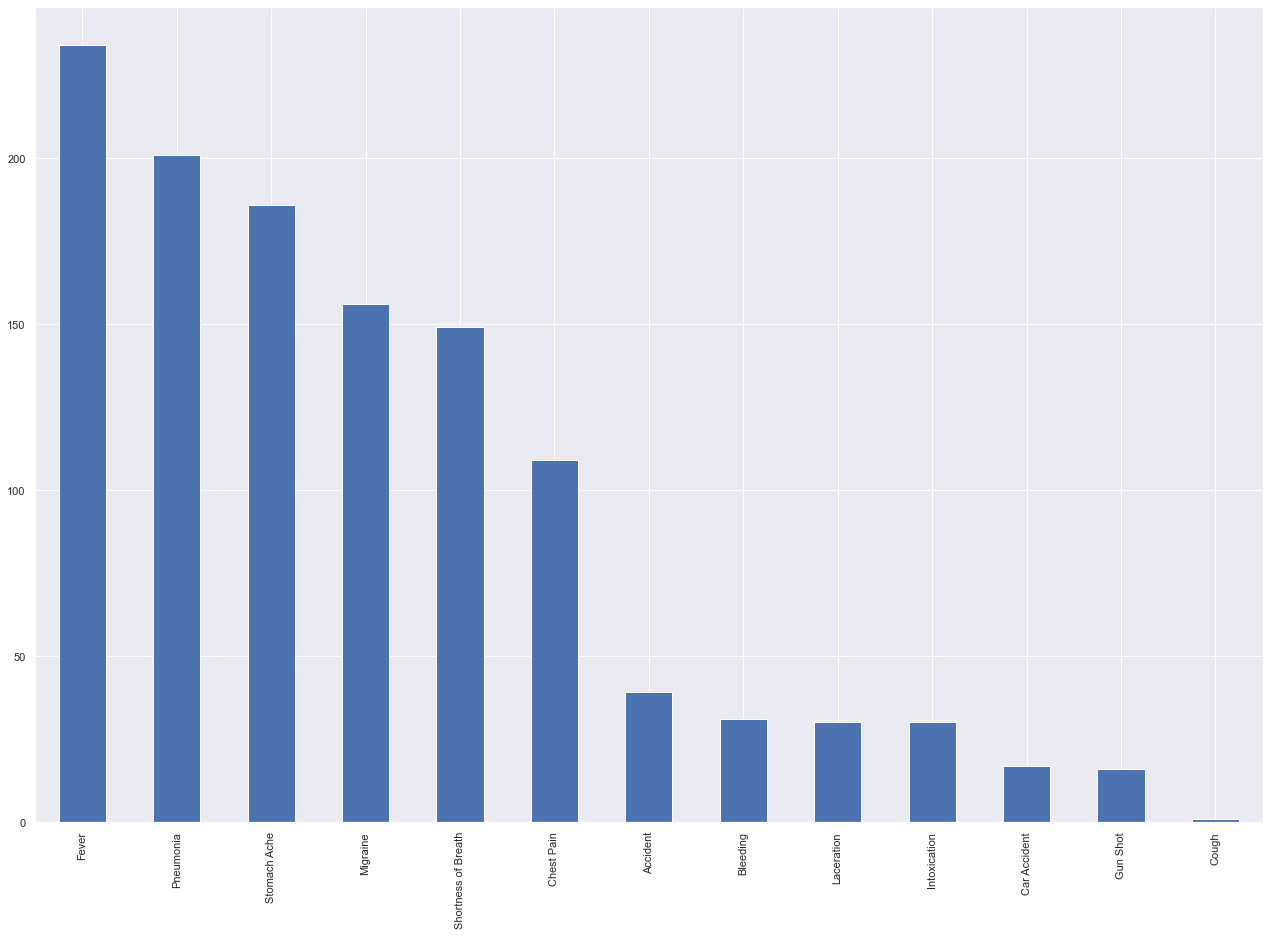

In [118]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df['ReasonForVisit'].value_counts().plot(kind='bar');

# Bonus Q 83.Display total count of patients service wise and gender wise separately.

In [119]:
df=pd.read_csv('HospitalDatabase-ReAdmissionRegistry.csv')
df['Service'].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

In [120]:
df=pd.read_csv('HospitalDatabase-Pateint.csv')
df['Gender'].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

# Bonus Q 84: Retrieve patient ids with abnormal BP range separtely (normal range DBP = 80, SBP = 120)

In [121]:
# Retrieve the rows where DBP<80
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df['BloodPressureDiastolic']<80

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureDiastolic, Length: 950, dtype: bool

In [122]:
# Retrieve the rows where SBP<120
df['BloodPressureSystolic']<120

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool

# Bonus Q 85. List of all the patients who did not show up. And the count of all the patients for each reason of visit.

In [123]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
df.loc[(df['VisitStatus']=='No Show'),:]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,3/19/2019,3/13/2019,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,3/19/2019,2/24/2019,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,4/2/2019,3/19/2019,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,3/3/2019,2/25/2019,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,3/16/2019,2/20/2019,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
149,414,90,3,2/25/2019,2/17/2019,5,Follow Up,136.0,90.802316,79.426026,No Show
150,507,891,16,1/25/2019,1/14/2019,11,Telemedicine,155.0,112.064259,73.714965,No Show
151,410,90,22,2/21/2019,1/31/2019,1,Follow Up,131.0,80.726116,54.947675,No Show
152,803,888,15,3/7/2019,2/25/2019,8,Telemedicine,173.0,136.377032,58.024363,No Show


In [125]:
df=pd.read_csv('HospitalDatabase-EDVisits.csv')
df.groupby('ReasonForVisit')['EDDisposition'].apply(lambda x: (x=='Admitted').sum()).reset_index(name='count')

,ReasonForVisit,count
0,Accident,39
1,Bleeding,16
2,Car Accident,17
3,Chest Pain,94
4,Cough,0
5,Fever,46
6,Gun Shot,16
7,Intoxication,0
8,Laceration,0
9,Migraine,47


# Bonus Q 86. Find the age ranges for patients based on primary Diagnosis.

In [126]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [127]:
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [128]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [129]:
# Merging Patients and Discharge tables
df_57 = Patients_df.merge(Discharges_df, how = 'outer',indicator=True)
df_57

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


<AxesSubplot:xlabel='Age', ylabel='PrimaryDiagnosis'>

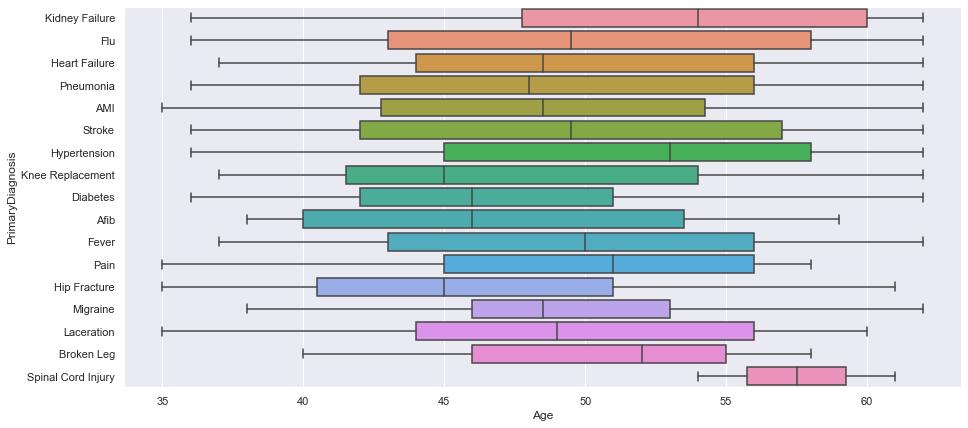

In [130]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_57,x='Age',y='PrimaryDiagnosis')

# Bonus Q 87. Count of 'No Show' in each visit type.

In [70]:
df=pd.read_csv('HospitalDatabase-AmulateryVisit.csv')
#df[df['VisitStatus']=='No Show'] 
df[df['VisitStatus']=='No Show'],[df['VisitType'].value_counts]

(     VisitID  PatientMRN  ProviderID DateofVisit DateScheduled  \
 0        202         840          29   3/19/2019     3/13/2019   
 1        436         820          25   3/19/2019     2/24/2019   
 2        794         879          30    4/2/2019     3/19/2019   
 3        799         884          37    3/3/2019     2/25/2019   
 4        515          32          26   3/16/2019     2/20/2019   
 ..       ...         ...         ...         ...           ...   
 149      414          90           3   2/25/2019     2/17/2019   
 150      507         891          16   1/25/2019     1/14/2019   
 151      410          90          22   2/21/2019     1/31/2019   
 152      803         888          15    3/7/2019     2/25/2019   
 153      505         889          14   1/23/2019     1/22/2019   
 
      VisitDepartmentID     VisitType  BloodPressureSystolic  \
 0                   10      Physical                  188.0   
 1                    3     Follow Up                  179.0   
 2

# Bonus Q 88. Showing the records of where the ExpectedLos is greater than the difference of the max and min ExpectedLos.

In [3]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
Expected_LOS=df['ExpectedLOS']
a=df['ExpectedLOS'].max()
b=df['ExpectedLOS'].min()
df_diff = a-b
primary_diagnosis_list = df.loc[(df['ExpectedLOS'] > df_diff)]
primary_diagnosis_list

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
12,398,134,2018-01-10,2018-01-15 16:43:47.026,Expired,ICU,Pneumonia,16.225126,0.460186
24,368,178,2018-01-14,2018-01-18 13:44:53.072,Expired,ICU,Spinal Cord Injury,15.183750,0.318426
31,369,198,2018-01-15,2018-01-31 14:28:07.437,Expired,ICU,Spinal Cord Injury,15.369330,0.082132
36,406,230,2018-01-18,2018-02-01 20:55:30.903,Expired,Cardiology,Afib,15.212173,0.487404
47,174,352,2018-01-29,2018-02-02 21:21:45.388,Expired,ICU,Pneumonia,16.989907,0.573870
87,295,560,2018-02-13,2018-02-26 18:17:22.826,Expired,Neurology,Heart Failure,16.785926,0.808604
92,297,588,2018-02-15,2018-02-26 14:46:54.780,Expired,Neurology,Stroke,15.958583,0.172149
101,691,709,2018-02-21,2018-03-01 08:44:33.655,Expired,Cardiology,Heart Failure,15.471412,0.362760
110,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198
119,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003
